In [17]:
import os
import clip
import torch
# from torchvision.datasets import CIFAR100
from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument(
        "--save_dir",
        type=str,
        help="path to save dataset"
    )
parser.add_argument(
        "--prompt_dir",
        type=str,
        help="path to prompt_dir"
    )
parser.add_argument(
        "--image_dir",
        type=str,
        help="path to image_dir"
    )

args = parser.parse_args()

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

img_path = args.image_dir
txt_path = args.prompt_dir

total = 0.0
average = 0.0
total_len = len(os.listdir(img_path))
assert len(os.listdir(img_path)) == len(os.listdir(txt_path))

for img_f, txt_f in zip(sorted(os.listdir(img_path)), sorted(os.listdir(txt_path))):
    print(img_f)
    print(txt_f)
    
    image = Image.open(os.path.join(img_path, img_f))
    with open(os.path.join(txt_path, txt_f), 'r') as f:
        text = f.readlines()
    
    image_input = preprocess(image).unsqueeze(0).to(device)
    text_inputs = torch.cat([clip.tokenize(text)]).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = image_features @ text_features.T
    # similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    print(similarity)
    #values, indices = similarity[0].topk(2)
    values, indices = similarity[0].topk(1)
    # Print the result
    total += value.item()
    
    print(f'CLIP-T: {100 * value.item():.2f}%')
    with open(os.path.join(args.save_dir, 'CLIP-T.txt'), 'a') as f:
        f.write(value.item())
        f.write('/n')

average = total / total_len
with open(os.path.join(args.save_dir, 'CLIP-T.txt'), 'a') as f:
    f.write(f'Average: {average}')
    f.write('/n')

print(f'Average: {average}')

10222.png
10222.txt
tensor([[0.3281]], device='cuda:0', dtype=torch.float16)

Top predictions:

CLIP-T:, 32.81%


In [5]:
type(image)

PIL.Image.Image

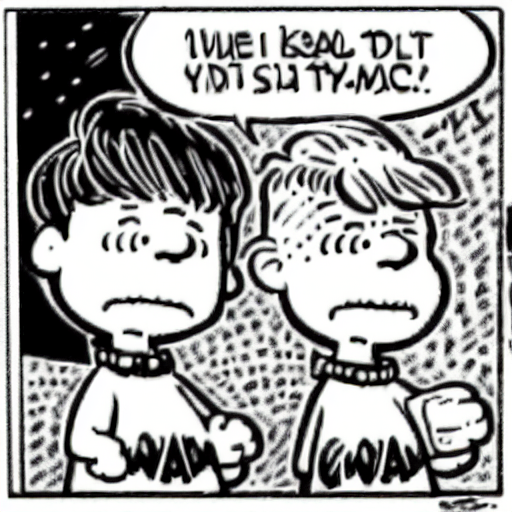

In [6]:
from PIL import Image

Image.open("/userHome/userhome1/sojeong/style/data/peanuts/0726_gen/custom/60.png")